In [1]:
import numpy as np
import pandas as pd
import sklearn

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/campusx-official/placement-project-logistic-regression/refs/heads/main/placement.csv')


In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.shape
#data of 100 data, 4rows

(100, 4)

In [5]:
#steps
#preprocess + EDA+  feature Selection
#extract inpu and output cols
#scale the values
#train test split
#evaluate the model /model selection
#deploy the model

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [7]:
#remove the unnecessary column,ie: unnamed, step 1 of preprocessing
df= df.iloc[:,1:] #using  iloc tofilter.

In [8]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [9]:
#For EDA(exploratory data analysis, we look through the data)
import matplotlib.pyplot as plt

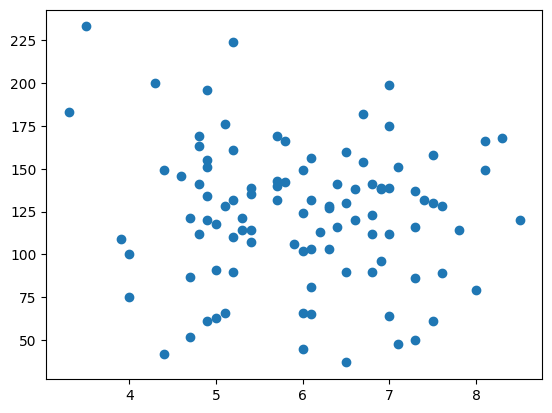

In [10]:
plt.scatter(df['cgpa'],df['iq'])

Text(0.5, 1.0, 'Scatter plot of cgpa and iq')

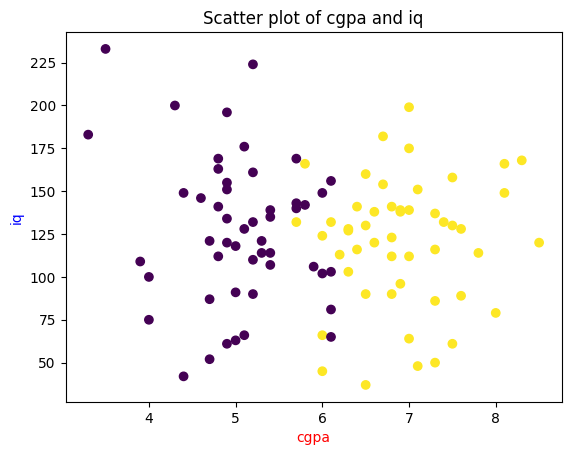

In [11]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])
plt.xlabel('cgpa',color='red')
plt.ylabel('iq',color='blue')
plt.title('Scatter plot of cgpa and iq')

In [12]:
#the yellow dots are the students who had placements
#the blue dots are the students who didn't had placements


In [13]:
#variables to independent variables,ie cgpa and iq
X= df.iloc[:,0:2] #for all rows, ie column cgpa and  iq
#variable to store dependent variable,   ie placements
Y=df.iloc[:,-1] #for all rows , only the last column


In [14]:
#fot this case,before scaling, we will traintest and split
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.1)#test size 0.1,means out of 100data, 10% will goto
#testing
#90% will go for training
#X_train: Training feature data (inputs for model learning)
#X_test: Testing feature data (inputs for model evaluation)
#Y_train: Training target/label data (correct outputs for training)
#Y_test: Testing target/label data (true results to compare model predictions against)

In [15]:
#scaling
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()


In [17]:
X_train = scaler.fit_transform(X_train)




In [18]:
X_test = scaler.transform(X_test)

In [19]:
#creating a ml model to so that it understands the data and its pattern
#for this project, we are using logistic regression
#logistic regression finds and divides the data with similar pattern so that we
#can find students who had placement and didnt have placement

from sklearn.linear_model import LogisticRegression


In [20]:
clf= LogisticRegression()


In [21]:
clf.fit(X_train,Y_train)


LogisticRegression()

In [22]:
#model  evaluation by looking the accuray trhough test data
Y_pred=clf.predict(X_test)
print(Y_pred)

[0 0 1 1 1 0 0 1 1 0]


In [23]:
print(Y_test)

88    0
10    1
65    1
82    1
0     1
73    0
80    0
55    1
20    1
41    0
Name: placement, dtype: int64


In [24]:
from sklearn.metrics import accuracy_score

In [25]:
accuracy_score(Y_test,Y_pred)

0.9

In [26]:
#plotting the decision boundary.
from mlxtend.plotting import plot_decision_regions

<Axes: >

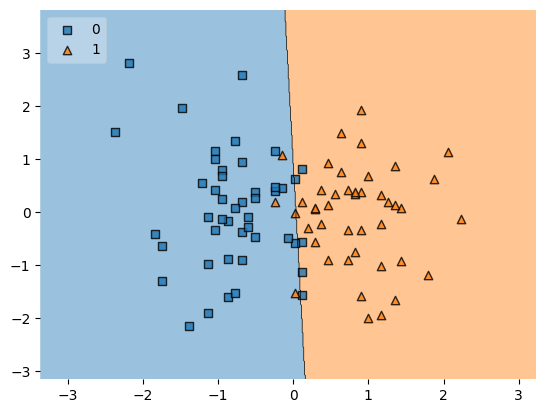

In [27]:

plot_decision_regions(X_train, Y_train.values, clf=clf, legend=2)

In [28]:
import pickle


In [29]:
pickle.dump(clf,open('model.pkl','wb'))